# Investigate results of fitting procedure

In [20]:
import sys
sys.path.append("../python/")

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import bokeh.palettes
import _corner
import imp
imp.reload(_corner)
from _corner import corner
import pickle
from matplotlib.offsetbox import AnchoredText

from matplotlib import rc
rc('font', family='times new roman', size=22.)

### Dependence with relative uncertainty on observed temperature

**TODO**: plotear randomly algún corner plot para ver qué está pasando

In [14]:
rel_unc_Tobs = [0.01, 0.02, 0.03, 0.05, 0.10, 0.25, 0.50]

mean = {}; median = {}; MAP = {}; ML = {};

for rel_unc in rel_unc_Tobs:
    data = np.genfromtxt("../results/bayesian/statistics.dat", unpack=True)
    mean[rel_unc]   = np.array((data[0], data[1]))
    #print(mean[rel_unc].shape, mean[rel_unc][:, 0], mean[rel_unc][0])
    median[rel_unc] = np.array((data[2], data[3]))
    MAP[rel_unc]    = np.array((data[4], data[5]))
    ML[rel_unc]     = np.array((data[6], data[7]))

(2, 20) [0.5291 1.2204] [0.5291 0.5359 0.3888 0.3701 0.4392 0.6008 0.3286 0.3434 0.5687 0.4812
 0.4473 0.337  0.5025 0.5933 0.543  0.569  0.4712 0.2478 0.6194 0.5003]


In [15]:
f_true     = 1.
gamma_true = 1.
true       = [f_true, gamma_true]
rank       = mean[rel_unc].shape[1]
D          = mean[rel_unc].shape[0] # dimension parameter space
FSE        = np.zeros((D, 4))

for i in range(D):
    FSE[i][0] = []; FSE[i][1] = []; FSE[i][2] = []; FSE[i][3] = []
    for rel_unc in rel_unc_Tobs:
        FSE[i][0].append(np.sqrt(1/rank*np.sum(np.power(mean[rel_unc][i] - true[i], 2)))/true[i])
        FSE[i][1].append(np.sqrt(1/rank*np.sum(np.power(median[rel_unc][i] - true[i], 2)))/true[i])
        FSE[i][2].append(np.sqrt(1/rank*np.sum(np.power(MAP[rel_unc][i] - true[i], 2)))/true[i])
        FSE[i][3].append(np.sqrt(1/rank*np.sum(np.power(ML[rel_unc][i] - true[i], 2)))/true[i])

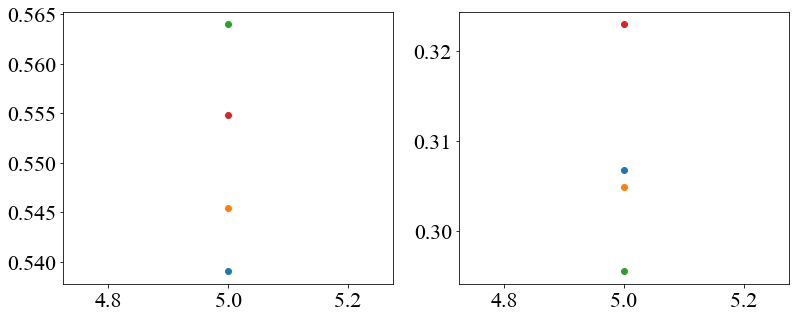

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))

rel_unc_Tobs = [1, 2, 3, 5, 10, 25, 50]
labels       = ["mean", "median", "MAP", "ML"]

for k in range(4):
    ax[0].scatter(rel_unc_Tobs, FSE[0][k], label=labels[k])
    ax[1].scatter(rel_unc_Tobs, FSE[1][k])

ax[0].legend(frameon=True)
ax[0].set_ylabel("FSE")
ax[0].set_xlabel(r"$\sigma_{T_{obs}}/T_{obs}\, [\%]$")
ax[1].set_xlabel(r"$\sigma_{T_{obs}}/T_{obs}\, [\%]$")

text_box = AnchoredText(r"$10^4$ BDs; $\gamma_{\rm true}=1$, $f_{\rm true}=1$", frameon=False, loc=1, pad=0.01)
plt.setp(text_box.patch, facecolor="white")
ax[1].add_artist(text_box)